In [7]:
import sys
import numpy as np
sys.path.append('../../../nn')
from mynn import *
from mydata import *
from datetime import datetime

import matplotlib as mpl 
from matplotlib.lines import Line2D 
# mpl.use('TkAgg')
import matplotlib.pyplot as plt

plt.rc("figure", dpi=300)           # High-quality figure ("dots-per-inch")
plt.rc("text", usetex=True)         # Crisp axis ticks
plt.rc("font", family="serif")      # Crisp axis labels
plt.rc("legend", edgecolor='none')  # No boxes around legends

plt.rc("figure",facecolor="#ffffff")
plt.rc("axes",facecolor="#ffffff",edgecolor="#000000",labelcolor="#000000")
plt.rc("savefig",facecolor="#ffffff")
plt.rc("text",color="#000000")
plt.rc("xtick",color="#000000")
plt.rc("ytick",color="#000000")

color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def colnorm(u):
	return np.sqrt(np.sum(u**2,0))


print("Here")
M = 20000

N = 64
ntrain = M//2
N_theta = 100
prefix = "../../../data/"
theta = np.load(prefix+"Random_NS_theta_" + str(N_theta) + ".npy")   
K = np.load(prefix+"Random_NS_omega_" + str(N_theta) + ".npy")
cs = np.load(prefix+"Random_NS_curl_f_" + str(N_theta) + ".npy")

acc=0.999

xgrid = np.linspace(0,1,N)
dx    = xgrid[1] - xgrid[0]

inputs  = cs
outputs = K


compute_input_PCA = True

if compute_input_PCA:
    train_inputs = np.reshape(inputs[:,:,:M//2], (-1, M//2))
    test_inputs  = np.reshape(inputs[:,:,M//2:M], (-1, M-M//2))
    Ui,Si,Vi = np.linalg.svd(train_inputs)
    en_f= 1 - np.cumsum(Si)/np.sum(Si)
    r_f = np.argwhere(en_f<(1-acc))[0,0]
    
    # r_f = min(r_f, 512)
    r_f = 101
    
    Uf = Ui[:,:r_f]
    f_hat = np.matmul(Uf.T,train_inputs)
    f_hat_test = np.matmul(Uf.T,test_inputs)

    x_train = torch.from_numpy(f_hat.T.astype(np.float32))
else:
    
    train_inputs =  theta[:M//2, :]
    test_inputs  = theta[M//2:M, :]
    r_f = N_theta
    x_train = torch.from_numpy(train_inputs.astype(np.float32))
    f_hat_test = test_inputs.T
    
train_outputs = np.reshape(outputs[:,:,:M//2], (-1, M//2))
test_outputs  = np.reshape(outputs[:,:,M//2:M], (-1, M-M//2))
Uo,So,Vo = np.linalg.svd(train_outputs)
en_g = 1 - np.cumsum(So)/np.sum(So)
r_g = np.argwhere(en_g<(1-acc))[0,0]
Ug = Uo[:,:r_g]
g_hat = np.matmul(Ug.T,train_outputs) 
y_train = torch.from_numpy(g_hat.T.astype(np.float32))


Here


## Training error 

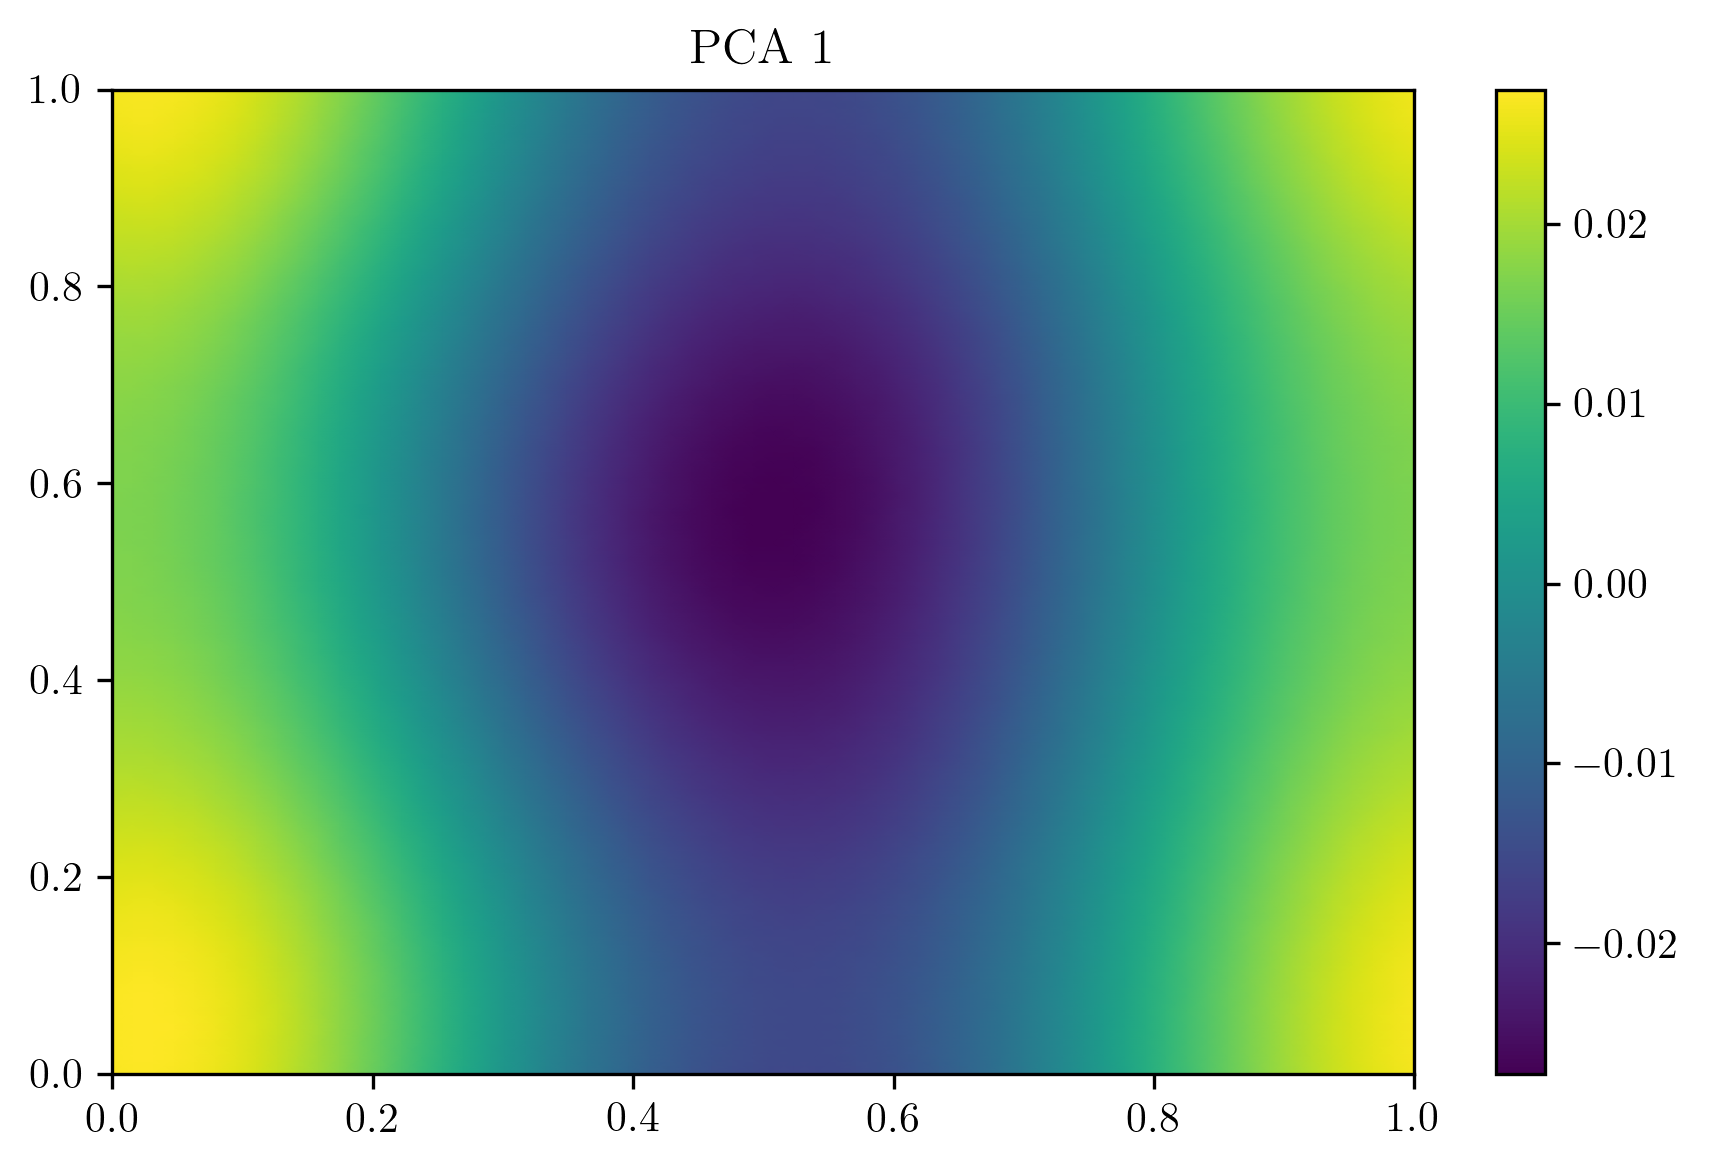

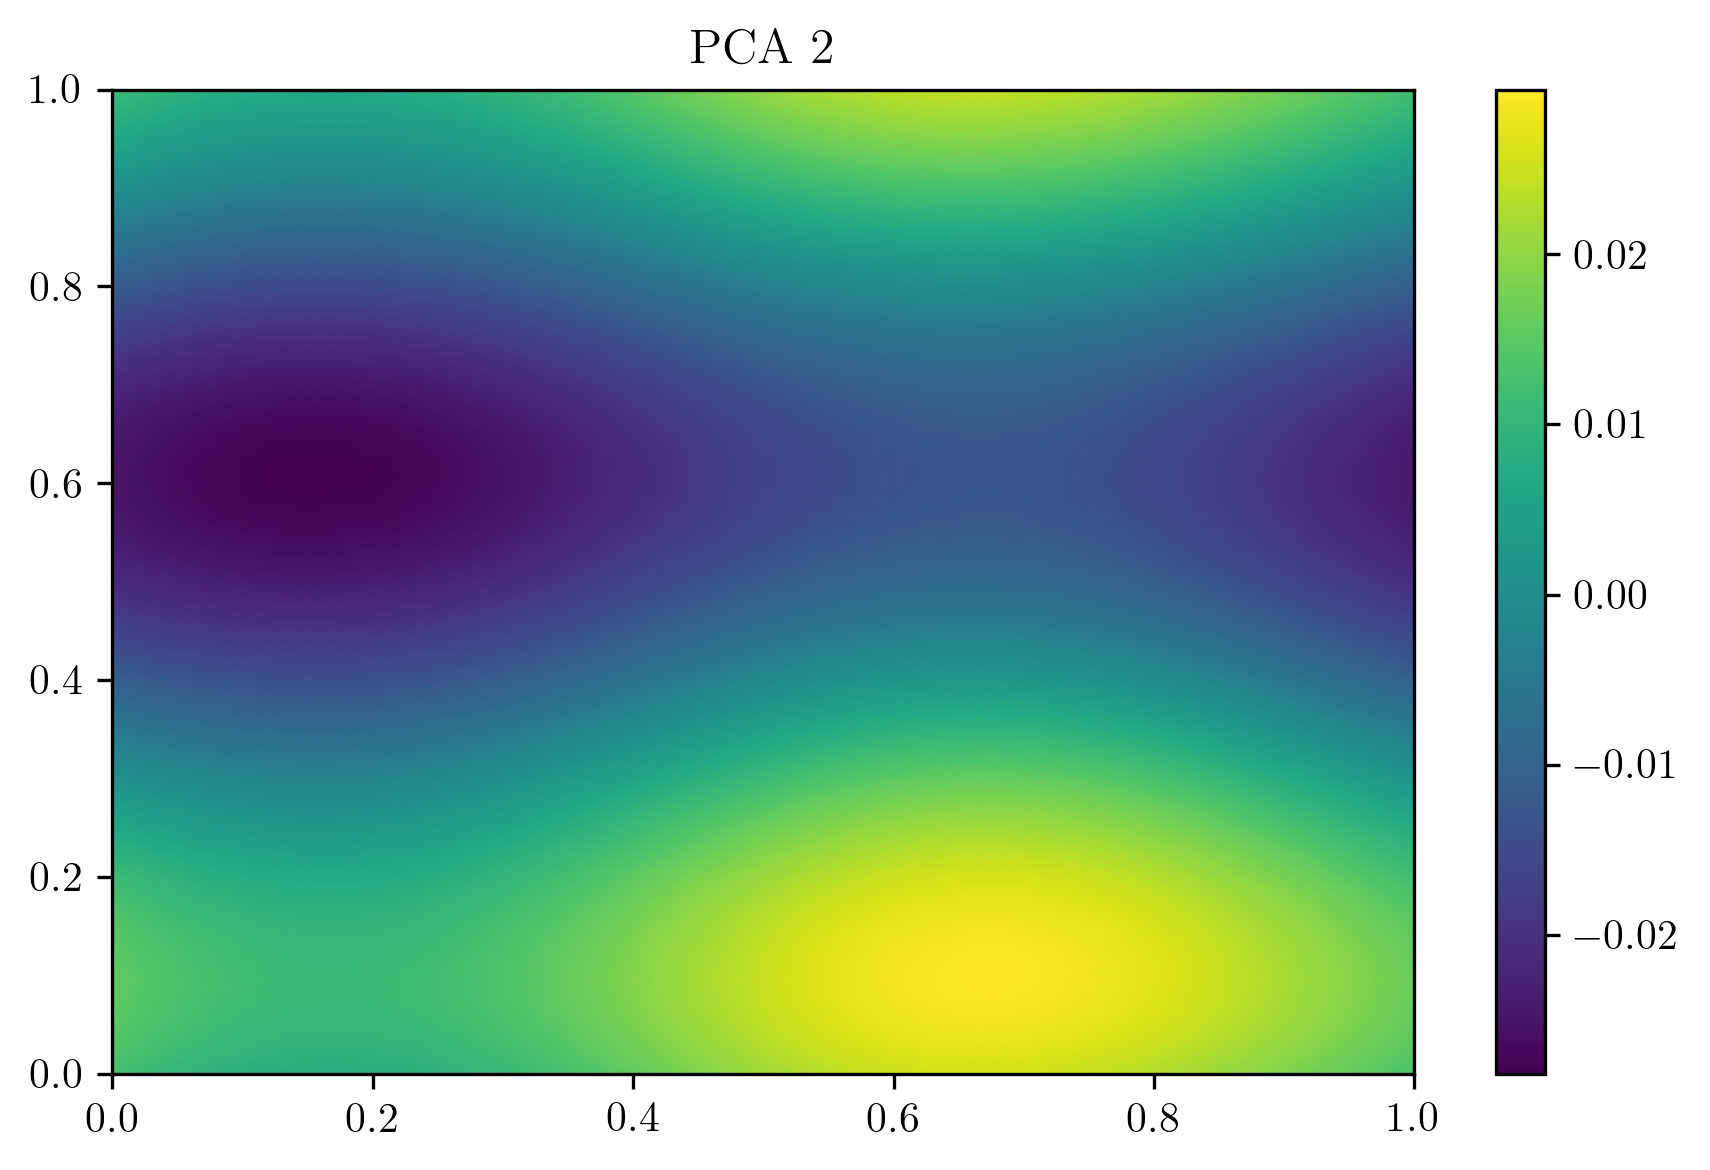

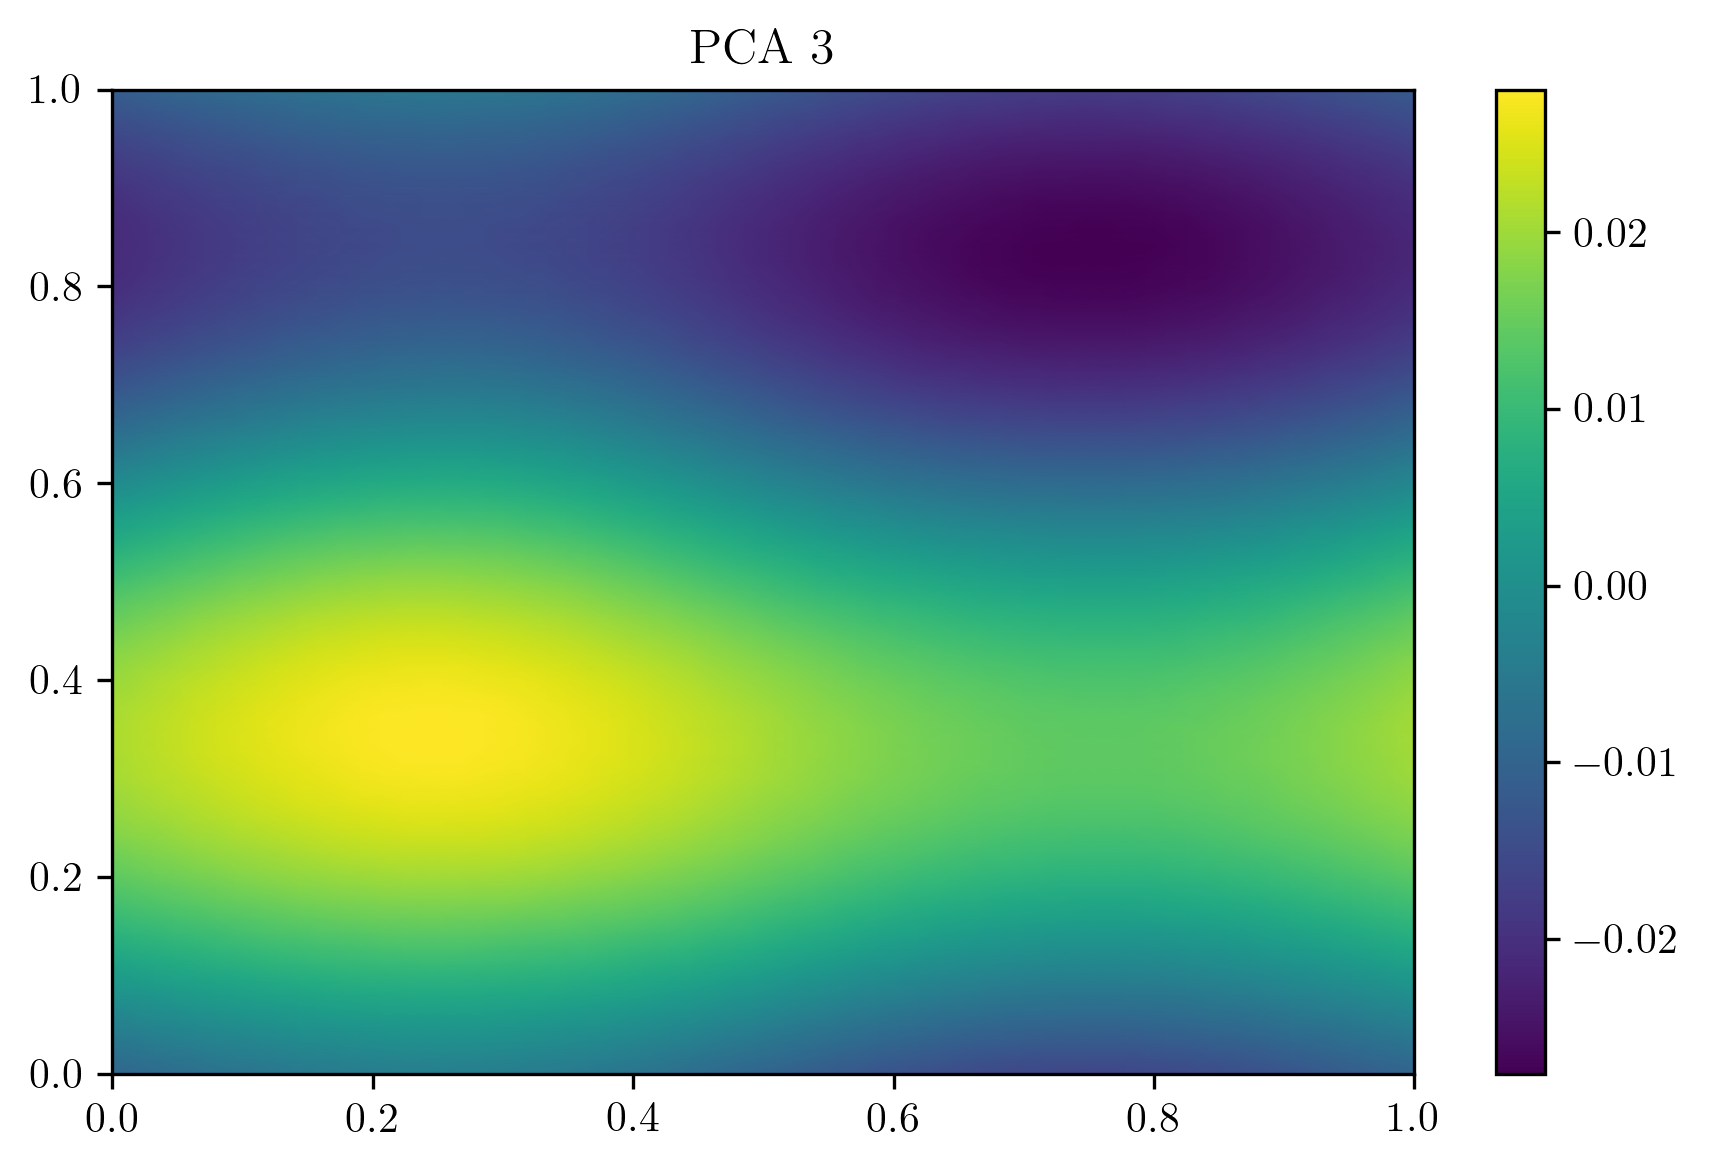

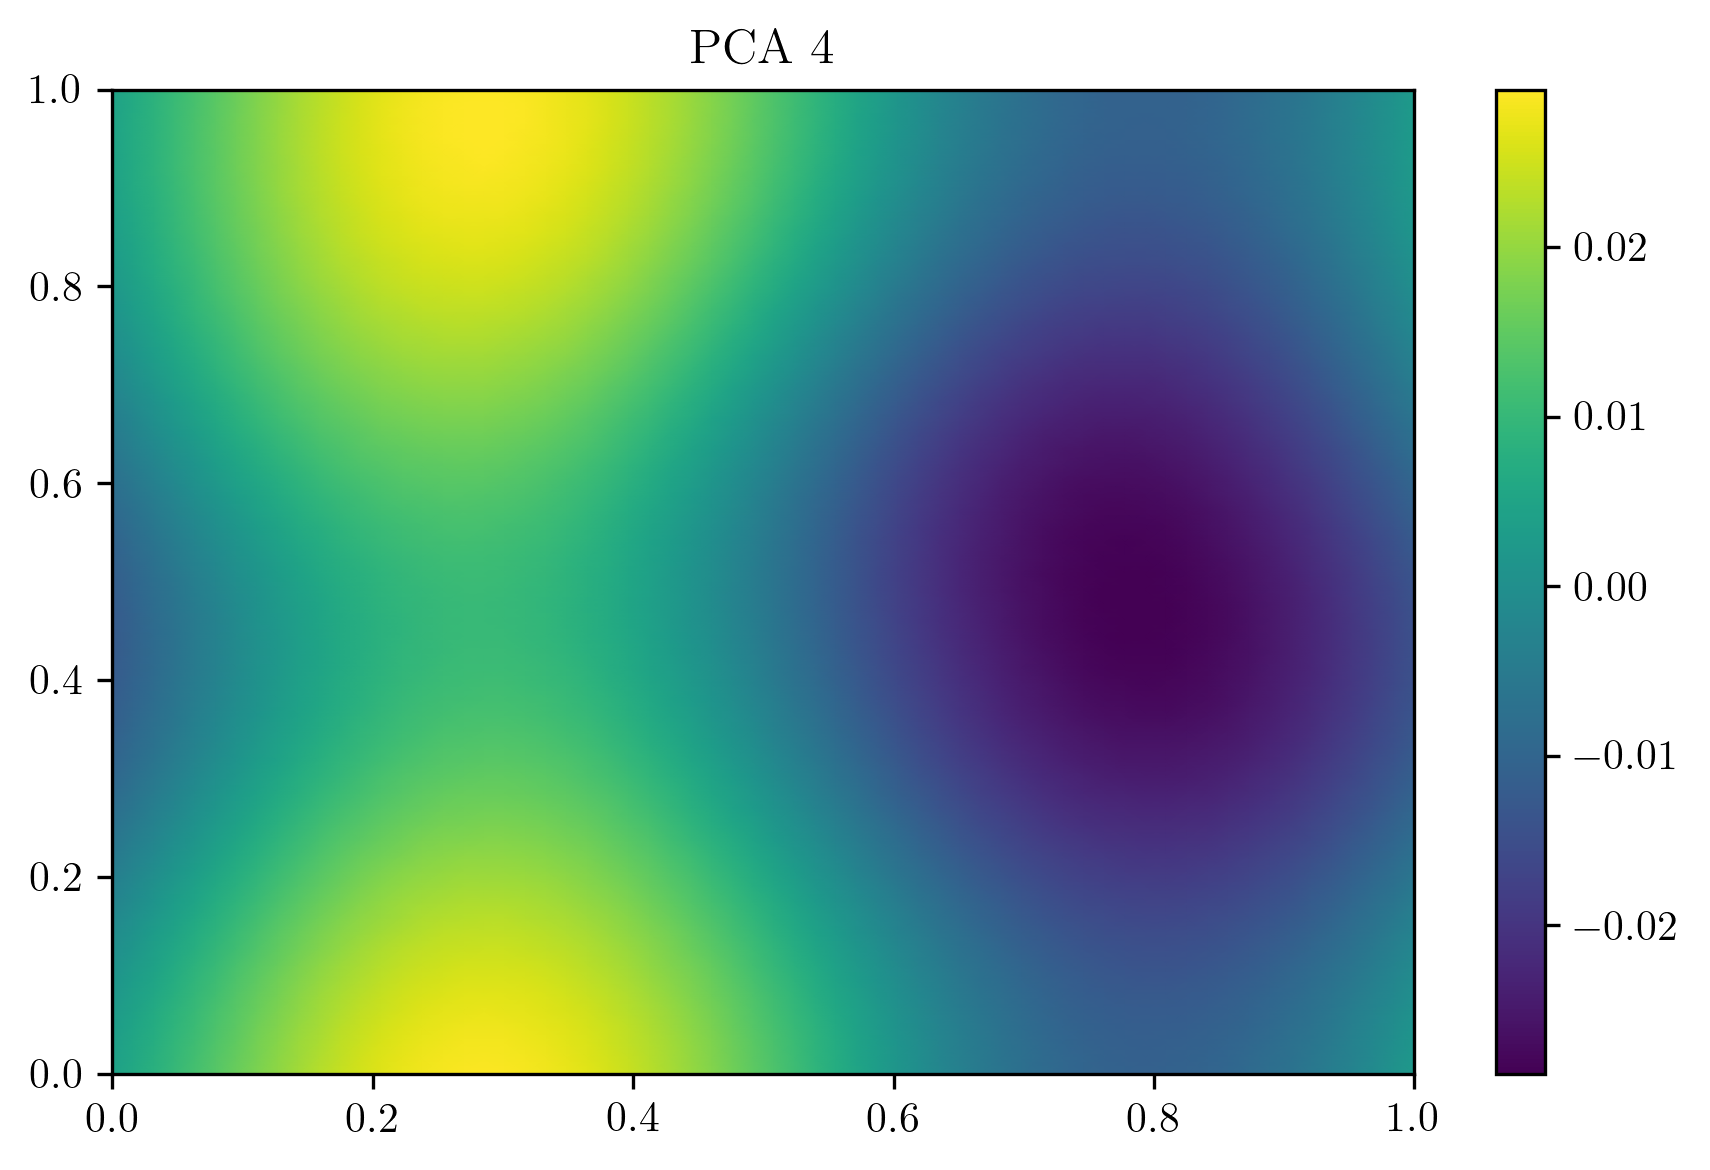

In [9]:
Y, X = np.meshgrid(xgrid, xgrid)

prefix = "./"
problem = "NS"
fig = plt.figure()
plt.pcolormesh(X, Y, np.reshape(Ug[:, 0], (N,N)), shading="gouraud")
plt.colorbar()
plt.title("PCA 1")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-0.png")

fig = plt.figure()
plt.pcolormesh(X, Y, np.reshape(Ug[:, 1], (N,N)), shading="gouraud")
plt.colorbar()
plt.title("PCA 2")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-1.png")

fig = plt.figure()
plt.pcolormesh(X, Y, np.reshape(Ug[:, 2], (N,N)), shading="gouraud")
plt.colorbar()
plt.title("PCA 3")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-2.png")
        
        
fig = plt.figure()
plt.pcolormesh(X, Y, np.reshape(Ug[:, 3], (N,N)), shading="gouraud")
plt.colorbar()
plt.title("PCA 4")
fig.tight_layout()
fig.savefig(prefix+problem+"PCA-3.png")



In [4]:
np.shape(np.reshape(Ug[:, 0], (N,N)))

ValueError: cannot reshape array of size 10201 into shape (64,64)

In [6]:
np.shape(train_outputs
        )

(10201, 10000)